In [1]:
import pandas as pd
from tqdm import tqdm
import json
from scipy import stats
from sklearn.preprocessing import minmax_scale
import numpy as np

In [2]:
df1 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_final_pass2.csv')
usecols1 = [x for x in df1.columns if 'prediction' not in x]
df1 = df1[usecols1]
print(df1.shape)
print(df1.columns)
df1.head(1)

(12447, 16)
Index(['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType',
       'source', 'uuid', 'aggressiveness_score', 'coherence_score',
       'relevance_score', 'suitableness_score', 'gpt-4_relevance_score',
       'gpt-4_coherence_score', 'gpt-4_aggressiveness_score',
       'gpt-4_suitableness_score', 'used_for_interannotations',
       'overall_score'],
      dtype='object')


,hatespeech,counterspeech,predicted_counterspeech,csType,source,uuid,aggressiveness_score,coherence_score,relevance_score,suitableness_score,gpt-4_relevance_score,gpt-4_coherence_score,gpt-4_aggressiveness_score,gpt-4_suitableness_score,used_for_interannotations,overall_score
0,Minorities vote to strip wealth and power from...,This is incorrect. jews could never be able to...,People's right to vote is not determined by ra...,Informative,dialoGPT,16229ec9-79d2-4b81-86aa-7a81335584b2,1,4,5,2,5,3,1,3,True,NaN


In [3]:
df1['used_for_interannotations'].value_counts()

used_for_interannotations
False    10385
True      2062
Name: count, dtype: int64

In [210]:
df2 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_final_metrics_calculated.csv')
usecols2 = [x for x in df2.columns if x not in usecols1]
usecols2.append('uuid')
df2 = df2[usecols2]
print(df2.columns)
df2.head(1)

Index(['id', 'obscenity_(pred_cs)', 'identity_attack_(pred_cs)',
       'insult_(pred_cs)', 'bleu_1_(pred_cs, cs)', 'bleu_2_(pred_cs, cs)',
       'cosine_similarity', 'rouge_l_(pred_cs, cs)', 'rouge_1_(pred_cs, cs)',
       'rouge_2_(pred_cs, cs)', 'meteor_score_(pred_cs, cs)',
       'bert_score_(hs, pred_cs)', 'toxicity_(pred_cs)',
       'pc_score_(hs, pred_cs)', 'cd_score_(hs, pred_cs)',
       'aq_score_(pred_cs)', 'bm25_score_(hs, pred_cs)',
       'bert_score_(pred_cs, cs)', 'bm25_score_(pred_cs, cs)',
       'bart_score_(pred_cs, cs)', 'bart_score_(cs,pred_cs)',
       'papi_toxicity_score_(pred_cs)', 'papi_threat_score_(pred_cs)',
       'papi_insult_score_(pred_cs)', 'papi_profanity_score_(pred_cs)',
       'papi_identity_attack_score_(pred_cs)', 'gpt_relevance_score',
       'gpt_aggressiveness_score', 'gpt_coherence_score',
       'gpt_suitableness_score', 'uuid'],
      dtype='object')


,id,obscenity_(pred_cs),identity_attack_(pred_cs),insult_(pred_cs),"bleu_1_(pred_cs, cs)","bleu_2_(pred_cs, cs)",cosine_similarity,"rouge_l_(pred_cs, cs)","rouge_1_(pred_cs, cs)","rouge_2_(pred_cs, cs)",...,papi_toxicity_score_(pred_cs),papi_threat_score_(pred_cs),papi_insult_score_(pred_cs),papi_profanity_score_(pred_cs),papi_identity_attack_score_(pred_cs),gpt_relevance_score,gpt_aggressiveness_score,gpt_coherence_score,gpt_suitableness_score,uuid
0,3,0.000019,0.00014,0.000138,0.225806,0.033354,0.227242,0.177778,0.177778,0.0,...,0.027207,0.006848,0.008501,0.013029,0.015255,1.0,2.0,3.0,2.0,16229ec9-79d2-4b81-86aa-7a81335584b2


In [211]:
df_merged = pd.merge(df1,df2[usecols2],on='uuid')
print(df_merged.shape)
df_merged.head(3)

(11312, 46)


,hatespeech,counterspeech,predicted_counterspeech,csType,source,uuid,aggressiveness_score,coherence_score,relevance_score,suitableness_score,...,"bart_score_(cs,pred_cs)",papi_toxicity_score_(pred_cs),papi_threat_score_(pred_cs),papi_insult_score_(pred_cs),papi_profanity_score_(pred_cs),papi_identity_attack_score_(pred_cs),gpt_relevance_score,gpt_aggressiveness_score,gpt_coherence_score,gpt_suitableness_score
0,Minorities vote to strip wealth and power from...,This is incorrect. jews could never be able to...,People's right to vote is not determined by ra...,Informative,dialoGPT,16229ec9-79d2-4b81-86aa-7a81335584b2,1,4,5,2,...,-3.327860,0.027207,0.006848,0.008501,0.013029,0.015255,1.0,2.0,3.0,2.0
1,The feminists have won. With so many women bei...,Replaced by what exactly? i think our populati...,Why do you believe women's rights are solely a...,Questioning,dialoGPT,1338eeaa-4332-477a-985c-a20d431ee171,1,3,4,2,...,-3.295844,0.100457,0.006440,0.021675,0.012756,0.095764,5.0,1.0,3.0,2.0
2,The feminists have won. With so many women bei...,This is absolutely the wrong stance to have on...,Feminism advocates for gender equality and rep...,Denouncing,dialoGPT,2b951b1b-88d5-4464-9d25-af013c071508,1,4,5,2,...,-3.295999,0.049584,0.007107,0.012605,0.017641,0.048996,5.0,1.0,4.0,3.0


In [213]:
df_merged['used_for_interannotations'].value_counts()

used_for_interannotations
False    9250
True     2062
Name: count, dtype: int64

In [ ]:
df_merged['used_for_interannotations'].value_counts()

In [212]:
df_merged.to_csv('/home/ameyh/cs-eval/data/analysis_df.csv', index=False)

### Example for Illustration purposes.

In [26]:
hatespeech = "Its always quite before the headscarves show up. Our neighbourhoods can no longer be the same."
counterspeech_gold = "Why would the presence of women wearing headscarves be seen as a disruption to quiet?"
counterspeech_A = "Isn't this view a reflection of ingrained stereotypes related to Islamophobia? By wearing the hijab, muslim women express their cultural and religious identity. It would be wrong to assume that Muslims are responsible for creating disturbance in communities."
counterspeech_B1 = "Wearing headscarves is just a matter of personal and cultural expression, much like any other choice in attire before going out. It's about personal style and comfort, not about creating any disturbance or impacting the quiet. Let's respect everyone's choices in how they present themselves, including the decision to wear headscarves, and appreciate the variety it brings to our collective experiences."
counterspeech_B = "The entire notion of headscarves disrupting peace is unfounded. Why would our neighbourhoods no longer be same? Wearing headscarves is a matter of personal expression, much like much like any other choice in attire before going out."

print(f"Hatespeech: {hatespeech}")
print(f"counterspeech_A: {counterspeech_A}")
print(f"counterspeech_B: {counterspeech_B}")

Hatespeech: Its always quite before the headscarves show up. Our neighbourhoods can no longer be the same.
counterspeech_A: Isn't this view a reflection of ingrained stereotypes related to Islamophobia? By wearing the hijab, muslim women express their cultural and religious identity. It would be wrong to assume that Muslims are responsible for creating disturbance in communities.
counterspeech_B: The entire notion of headscarves disrupting peace is unfounded. Why would our neighbourhoods no longer be same? Wearing headscarves is a matter of personal expression, much like much like any other choice in attire before going out.


In [23]:
from metrics import Metrics

compute_metrics = Metrics()

rouge_l, rouge_1, rouge_2 = compute_metrics.compute_rouge_score(predictions=[counterspeech_A], references=[hatespeech])
print(f"Rouge Scores 1: {rouge_l}, {rouge_1}, {rouge_2}")

rouge_l, rouge_1, rouge_2 = compute_metrics.compute_rouge_score(predictions=[counterspeech_B], references=[hatespeech])
print(f"Rouge Scores 2: {rouge_l}, {rouge_1}, {rouge_2}")

df1 = pd.DataFrame(columns=['hatespeech', 'counterspeech', 'predicted_counterspeech','csType'])
df1['hatespeech'] = [hatespeech]
df1['counterspeech'] = [hatespeech]
df1['predicted_counterspeech'] = [counterspeech_A]
df1['csType'] = ['Informative']

df2 = pd.DataFrame(columns=['hatespeech', 'counterspeech', 'predicted_counterspeech'])
df2['hatespeech'] = [hatespeech]
df2['counterspeech'] = [hatespeech]
df2['predicted_counterspeech'] = [counterspeech_B]
df2['csType'] = ['Informative']


df1 = compute_metrics.get_generation_metrics(df1)
df2 = compute_metrics.get_generation_metrics(df2)

Rouge Scores 1: [0.07999999580000022], [0.07999999580000022], [0.0]
Rouge Scores 2: [0.21276595310095073], [0.25531914459031246], [0.07999999580000022]
Size of input df: 1
Cleaning test data
--------------------------------------------------
Calculating rouge score
--------------------------------------------------
Calculating Bleu1 and Bleu2 score
--------------------------------------------------
Calculating Meteor score


/home/ameyh/.conda/envs/cs-eval/lib/python3.9/site-packages/datasets/load.py:752: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/ameyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ameyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ameyh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--------------------------------------------------
Calculating Cosine Similarity
--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Toxicity score


Running Toxicity inference on 1 data points: 100%|██████████| 1/1 [00:00<00:00, 82.20it/s]


--------------------------------------------------
Calculating PC Score
--------------------------------------------------
Calculating CD Score


Running PC/CD/AQ inference on 1 data points: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


--------------------------------------------------
Calculating BM25 Score
--------------------------------------------------
Calculating BM25 Score
Size of input df: 1
Cleaning test data
--------------------------------------------------
Calculating rouge score
--------------------------------------------------
Calculating Bleu1 and Bleu2 score
--------------------------------------------------
Calculating Meteor score


/home/ameyh/.conda/envs/cs-eval/lib/python3.9/site-packages/datasets/load.py:752: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/ameyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ameyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ameyh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--------------------------------------------------
Calculating Cosine Similarity
--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Toxicity score


Running Toxicity inference on 1 data points: 100%|██████████| 1/1 [00:00<00:00, 74.44it/s]


--------------------------------------------------
Calculating PC Score
--------------------------------------------------
Calculating CD Score


Running PC/CD/AQ inference on 1 data points: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


--------------------------------------------------
Calculating BM25 Score
--------------------------------------------------
Calculating BM25 Score


In [25]:
for col in df1.columns:
    if col not in ['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType']:
        print('- -'*20)
        value_A = round(df1.iloc[0][col],6)
        value_B = round(df2.iloc[0][col],6)
        print(col)
        print(f"A: {value_A}\nB: {value_B}")

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
obscenity_(pred_cs)
A: 0.001164
B: 4.3e-05
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
identity_attack_(pred_cs)
A: 0.126093
B: 0.00013
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
insult_(pred_cs)
A: 0.006968
B: 0.00023
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_1_(pred_cs, cs)
A: 0.092369
B: 0.099138
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_2_(pred_cs, cs)
A: 0.014335
B: 0.015289
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
cosine_similarity
A: 0.064217
B: 0.253148
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_l_(pred_cs, cs)
A: 0.08
B: 0.297872
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_1_(pred_cs, cs)
A: 0.08
B: 0.340426
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_2_(pred_cs, cs)
A: 0.0
B: 0.12
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
meteo

In [27]:
df1.to_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechA.csv',index=False)
df2.to_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechB.csv',index=False)

In [2]:
df1 = pd.read_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechA.csv')
df2 = pd.read_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechB.csv')

In [3]:
for col in df1.columns:
    if col not in ['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType'] and not col.startswith('prediction_'):
        print('- -'*20)
        value_A = df1.iloc[0][col]
        value_B = df2.iloc[0][col]
        print(col)
        print(f"A: {value_A}\nB: {value_B}")

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
obscenity_(pred_cs)
A: 0.0011641413439065
B: 4.31256448791828e-05
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
identity_attack_(pred_cs)
A: 0.1260934174060821
B: 0.0001299760479014
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
insult_(pred_cs)
A: 0.006968037225306
B: 0.0002301395434187
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_1_(pred_cs, cs)
A: 0.0923694779116465
B: 0.0991379310344827
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_2_(pred_cs, cs)
A: 0.0143353308670557
B: 0.0152891081667543
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
cosine_similarity
A: 0.0642172600209856
B: 0.2531476537622941
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_l_(pred_cs, cs)
A: 0.0799999958000002
B: 0.2978723360796741
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_1_(pred_cs, cs)
A: 0.0799999958000002
B: 0.340425527

### Correlation Analysis 

In [2]:
from scipy.stats import spearmanr, kendalltau
from sklearn.preprocessing import MinMaxScaler

def change(df, percentage, column_name, how="decrement"):
    """
    Randomly increases the 'column_name' of a given percentage of rows by 1.
    Only rows with 'column_name' of 1, 2, 3, or 4 are eligible.

    Args:
    df (pd.DataFrame): The dataframe with the 'column_name' column.
    percentage (float): The percentage of eligible rows to increase.

    Returns:
    pd.DataFrame: A new dataframe with the updated 'column_name' values.
    """
    if how=="increment":
        # Filter eligible rows
        eligible = df[column_name] < 5
        
        # Calculate the number of rows to increase
        num_rows_to_increase = int(np.floor(eligible.sum() * (percentage / 100)))
        
        # Randomly select rows to increase
        rows_to_increase = np.random.choice(df[eligible].index, size=num_rows_to_increase, replace=False)
        
        # Increase 'aggressiveness_score' by 1 for the selected rows
        df.loc[rows_to_increase, column_name] += 1
        
    else:
    
        # Filter eligible rows
        eligible = df[column_name] > 1
        
        # Calculate the number of rows to increase
        num_rows_to_increase = int(np.floor(eligible.sum() * (percentage / 100)))
        
        # Randomly select rows to increase
        rows_to_increase = np.random.choice(df[eligible].index, size=num_rows_to_increase, replace=False)
        
        # Increase 'aggressiveness_score' by 1 for the selected rows
        df.loc[rows_to_increase, column_name] -= 1    
    
    return df

def reduce_dataframe(df, reduction_size, max_num):
    """
    Reduces the dataframe by removing a specified number of rows where the 'overall_score' is 7.
    
    Args:
    df (pd.DataFrame): The dataframe to be reduced.
    reduction_size (int): The number of rows to remove.
    
    Returns:
    pd.DataFrame: The reduced dataframe.
    """
    # Filter rows where 'overall_score' is max_num
    score_7_filter = df['overall_score'] == max_num
    
    # Calculate the number of rows to remove, ensuring not to exceed the available rows
    num_rows_to_remove = min(reduction_size, score_7_filter.sum())
    
    # Find indices of rows to remove
    indices_to_remove = df[score_7_filter].index[:num_rows_to_remove]
    
    # Drop the selected rows
    reduced_df = df.drop(index=indices_to_remove)
    
    return reduced_df

def calculate_correlations_with_scaling(df, col1, col2):
    """
    Calculate Spearman's rho and Kendall's tau for two columns in a DataFrame after scaling.

    Parameters:
    - df: pandas.DataFrame containing the data.
    - col1: str, name of the first column.
    - col2: str, name of the second column.

    Returns:
    - spearman_rho: Spearman's rho coefficient after scaling.
    - kendall_tau: Kendall's tau coefficient after scaling.
    """
    df[col1] = df[col1].apply(lambda x: 3 if x == -1 else x)
    df[col2] = df[col2].apply(lambda x: 3 if x == -1 else x)
    """
    # Initialize the MinMaxScaler to scale between -1 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Scale the specified columns
    scaled_values = scaler.fit_transform(df[[col1, col2]])
    
    # Update the DataFrame with the scaled values
    # df_scaled = df
    df_scaled = pd.DataFrame(scaled_values, columns=[col1, col2])
    
    # Calculate Spearman's rho on the scaled data
    spearman_rho, spearman_p_value = spearmanr(df_scaled[col1], df_scaled[col2])
    
    # Calculate Kendall's tau on the scaled data
    kendall_tau, kendall_p_value = kendalltau(df_scaled[col1], df_scaled[col2])
    """

    x = np.array(df[col1].values.tolist())
    y = np.array(df[col2].values.tolist())
    # x = minmax_scale(x)
    # y = minmax_scale(y)   
    
    spearman_rho = stats.spearmanr(x,y).statistic
    kendall_tau = stats.kendalltau(x,y).statistic
    
    print(spearman_rho, kendall_tau)

    return spearman_rho, kendall_tau


def calculate_correlation_matrices(df, automated_metrics, human_ratings):
    """
    Calculate Spearman's rho and Kendall's tau matrices for multiple automated metrics against human ratings.

    Parameters:
    - df: pandas.DataFrame containing the data.
    - automated_metrics: list of str, names of the automated metric columns.
    - human_ratings: list of str, names of the human rating columns.

    Returns:
    - spearman_df: DataFrame containing Spearman's rho values.
    - kendall_df: DataFrame containing Kendall's tau values.
    """
    spearman_results = []
    kendall_results = []
    
    # Iterate over each combination of automated metric and human rating
    for metric in automated_metrics:
        spearman_row = []
        kendall_row = []
        for rating in human_ratings:
            # spearman_rho, _ = spearmanr(df[metric], df[rating])
            # kendall_tau, _ = kendalltau(df[metric], df[rating])
            spearman_rho, kendall_tau = calculate_correlations_with_scaling(df, metric, rating)
            # print(spearman_rho, kendall_tau)
            spearman_row.append(spearman_rho)
            kendall_row.append(kendall_tau)
        
        spearman_results.append(spearman_row)
        kendall_results.append(kendall_row)
        
    # Convert the results to DataFrames
    spearman_df = pd.DataFrame(spearman_results, index=automated_metrics, columns=human_ratings)
    kendall_df = pd.DataFrame(kendall_results, index=automated_metrics, columns=human_ratings)
    
    return spearman_df, kendall_df

In [3]:
df = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/dataset_metrics_calculated.csv')
print(df.shape)
df.head(1)

(7926, 111)


,level_0,index,hatespeech,counterspeech,predicted_counterspeech,csType,suitableness_score,relevance_score,coherence_score,aggressiveness_score,...,zs_Llama-3-8b-chat-hf_suitableness_score,zs_Llama-3-8b-chat-hf_aggressiveness_score,Mistral-7B-Instruct-v03_relevance_score,Mistral-7B-Instruct-v03_coherence_score,Mistral-7B-Instruct-v03_suitableness_score,Mistral-7B-Instruct-v03_aggressiveness_score,zs_Mistral-7B-Instruct-v03_relevance_score,zs_Mistral-7B-Instruct-v03_coherence_score,zs_Mistral-7B-Instruct-v03_suitableness_score,zs_Mistral-7B-Instruct-v03_aggressiveness_score
0,0,0.0,Jews have no place here. They are not a part o...,"Jews are part of most societies, why should we...",Why do you believe that jews are not part of t...,Questioning,1.666667,3.333333,2.333333,1.666667,...,3.0,1.0,-1.0,-1.0,-1.0,-1.0,5.0,3.0,3.0,2.0


In [4]:
df.columns

Index(['level_0', 'index', 'hatespeech', 'counterspeech',
       'predicted_counterspeech', 'csType', 'suitableness_score',
       'relevance_score', 'coherence_score', 'aggressiveness_score',
       ...
       'zs_Llama-3-8b-chat-hf_suitableness_score',
       'zs_Llama-3-8b-chat-hf_aggressiveness_score',
       'Mistral-7B-Instruct-v03_relevance_score',
       'Mistral-7B-Instruct-v03_coherence_score',
       'Mistral-7B-Instruct-v03_suitableness_score',
       'Mistral-7B-Instruct-v03_aggressiveness_score',
       'zs_Mistral-7B-Instruct-v03_relevance_score',
       'zs_Mistral-7B-Instruct-v03_coherence_score',
       'zs_Mistral-7B-Instruct-v03_suitableness_score',
       'zs_Mistral-7B-Instruct-v03_aggressiveness_score'],
      dtype='object', length=111)

In [583]:
# df_temp = pd.read_csv('/home/ameyh/cs-eval/final_data/annotations_final_for_gods_sake.csv')
# df['gpt-4-zs_relevance_score"'] = df_temp['gpt-4_relevance_score']

In [584]:
# df['GPTScore_relevance_score'] = df['gpt-4_relevance_score']
# df['GPTScore_coherence_score'] = df['gpt-4_coherence_score']
# df['GPTScore_aggressiveness_score'] = df['gpt-4_aggressiveness_score']
# df['GPTScore_suitableness_score'] = df['gpt-4_suitableness_score']

In [585]:
# df = increment(df, 20.12, column_name="suitableness_score")
# df = increment(df, 98.5, column_name="gpt-4_aggressiveness_score")
# df = increment(df, 59.5, column_name="gpt-4_suitableness_score")
# df = change(df, 19.80, column_name="GPTScore_aggressiveness_score", how="decrement")

In [586]:
df.shape

(12447, 82)

In [587]:
# df.to_csv('/home/ameyh/cs-eval/results.csv', index=False)

In [588]:
print(df.columns)

Index(['level_0', 'hatespeech', 'counterspeech', 'predicted_counterspeech',
       'csType', 'source', 'prediction_(prompt_aggressiveness_score)_(gpt-4)',
       'prediction_(prompt_relevance_score)_(gpt-4)', 'uuid',
       'prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo)',
       'prediction_(prompt_coherence_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_relevance_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_suitableness_score)_(gpt-3.5-turbo)',
       'aggressiveness_score', 'coherence_score', 'relevance_score',
       'suitableness_score', 'bert_score_(pred_cs, cs)',
       'bm25_score_(pred_cs, cs)', 'obscenity_(pred_cs)',
       'identity_attack_(pred_cs)', 'insult_(pred_cs)', 'bleu_1_(pred_cs, cs)',
       'bleu_2_(pred_cs, cs)', 'rouge_l_(pred_cs, cs)',
       'rouge_1_(pred_cs, cs)', 'rouge_2_(pred_cs, cs)',
       'meteor_score_(pred_cs, cs)', 'bert_score_(hs, pred_cs)',
       'toxicity_(pred_cs)', 'pc_score_(hs, pred_cs)',
       'cd_score_(hs, pred_cs)'

In [638]:
df.source.value_counts()

source
GPT3.5_ZS    4109
GPT3.5_FS    2818
QUARC        2553
dialoGPT     2322
GPS           645
Name: count, dtype: int64

In [647]:
df_temp = df.copy()
df_temp['source'] = df_temp.apply(lambda row: 'GPT3.5_ZS' if row['len'] > 487 else row['source'], axis=1)
df_temp.head(1)

,level_0,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),...,GPTScore_coherence_score,GPTScore_aggressiveness_score,GPTScore_suitableness_score,"bleu_3_(pred_cs, cs)","bleu_4_(pred_cs, cs)",UniEval_coherence,UniEval_relevance,UniEval_suitableness,UniEval_aggressiveness,len
0,3,Minorities vote to strip wealth and power from...,This is incorrect. jews could never be able to...,People's right to vote is not determined by ra...,Informative,dialoGPT,{ \n'Aggressiveness': '1'\n},{ \n'Relevance': '5'\n},16229ec9-79d2-4b81-86aa-7a81335584b2,NaN,...,1.0,2,2,0.00249,0.001259,0.61783,0.674624,0.531084,0.589828,94


In [648]:
def change_source(row):
    if row['source'] == 'GPT3.5_ZS':
        if 

df_temp['source'] = df_temp['source'].apply(lambda x: )

source
GPT3.5_ZS    6282
QUARC        2553
dialoGPT     1977
GPT3.5_FS    1004
GPS           631
Name: count, dtype: int64

<Axes: >

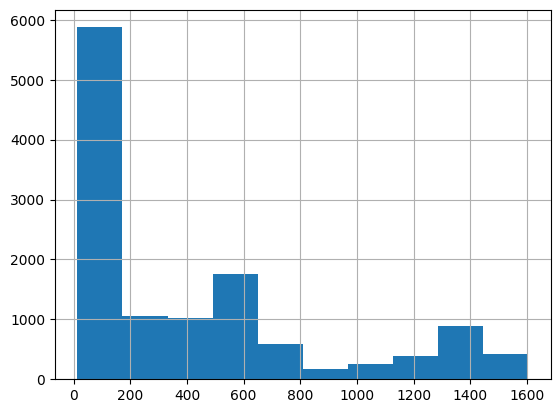

In [641]:
df['len'] = df['predicted_counterspeech'].apply(lambda x: len(x))
df['len'].hist()

In [ ]:
df

In [620]:
human_ratings = ['relevance_score', 'aggressiveness_score', 'coherence_score', 'suitableness_score']
automated_metrics = [
    'bleu_1_(pred_cs, cs)',
    'bleu_2_(pred_cs, cs)', 
    'bleu_3_(pred_cs, cs)', 
    'bleu_4_(pred_cs, cs)', 
    'rouge_1_(pred_cs, cs)', 
    'rouge_2_(pred_cs, cs)', 
    'rouge_l_(pred_cs, cs)', 
    'meteor_score_(pred_cs, cs)', 
    'bert_score_(hs, pred_cs)', 
    'bert_score_(pred_cs, cs)', 
    # 'bm25_score_(hs, pred_cs)',
    # 'bm25_score_(pred_cs, cs)',
    'bart_score_(hs,pred_cs)',
    'bart_score_(cs, pred_cs)',
    'bart_score_(pred_cs, cs)',
    'UniEval_aggressiveness',
    'UniEval_coherence',
    'UniEval_relevance',
    'UniEval_suitableness',
    # 'coherence_UniEval_(hs, cs, pred_cs)',
    # 'consistency_UniEval_(hs, cs, pred_cs)',
    # 'fluency_UniEval_(hs, cs, pred_cs)',
    # 'relevance_UniEval_(hs, cs, pred_cs)',
    'pc_score_(hs, pred_cs)',
    'aq_score_(pred_cs)',
    'cd_score_(hs, pred_cs)',
    'pd_score_(hs, pred_cs)',
    'negative_pc_score_(hs, pred_cs)',
    # 'toxicity_(pred_cs)',
    # 'obscenity_(pred_cs)',
    # 'identity_attack_(pred_cs)',
    # 'insult_(pred_cs)'
    'gpt-4_relevance_score',
    'gpt-4_aggressiveness_score',
    'gpt-4_coherence_score',
    'gpt-4_suitableness_score',
    'gpt-4-zs_relevance_score',
    'gpt-4-zs_coherence_score',
    'gpt-4-zs_aggressiveness_score',
    'gpt-4-zs_suitableness_score',
    'GEVAL-4_relevance_score',
    'GEVAL-4_coherence_score',
    'GEVAL-4_aggressiveness_score',
    'GEVAL-4_suitableness_score',
    'GPTScore_relevance_score',
    'GPTScore_coherence_score',
    'GPTScore_aggressiveness_score',
    'GPTScore_suitableness_score',
    # 'relevance_score',
    # 'aggressiveness_score',
    # 'coherence_score',
    # 'suitableness_score',
    # 'papi_toxicity_score_(pred_cs)'
]


spearman_df, kendall_df = calculate_correlation_matrices(df, automated_metrics, human_ratings)

0.03899457026961422 0.03271906577213724
-0.13748489921972784 -0.1112078361481944
0.17685544421235422 0.12956838280293323
0.07077079824602925 0.05976906666739444
0.03668288770390911 0.029627289440528944
0.10456003576229013 0.07986164346747388
-0.01883832781580199 -0.021727014668548927
0.03144927672045682 0.025987112867357613
0.022967459968660692 0.018866392031020505
0.11094889739512137 0.0846878730146912
-0.05024700897405748 -0.045316765973129176
0.012701872531272897 0.010906164522118962
0.022967459968660692 0.018866392031020505
0.11094889739512137 0.0846878730146912
-0.05024700897405748 -0.045316765973129176
0.012701872531272897 0.010906164522118962
0.2026623175805784 0.1580603005294524
-0.11975782477191106 -0.09236661952582492
0.4140952803983994 0.3148031842099946
0.26755326226491893 0.21531303380234015
0.18534455266040073 0.15373007774661768
-0.15687599386547524 -0.12747556791872092
0.42293493402417176 0.3334551756955112
0.26159708265917714 0.2225766906861749
0.20868204058623915 0.16

In [621]:
# spearman_df = spearman_df.rename_axis('metric')
spearman_df['metric'] = spearman_df.index
spearman_df

,relevance_score,aggressiveness_score,coherence_score,suitableness_score,metric
"bleu_1_(pred_cs, cs)",0.038995,-0.137485,0.176855,0.070771,"bleu_1_(pred_cs, cs)"
"bleu_2_(pred_cs, cs)",0.036683,0.104560,-0.018838,0.031449,"bleu_2_(pred_cs, cs)"
"bleu_3_(pred_cs, cs)",0.022967,0.110949,-0.050247,0.012702,"bleu_3_(pred_cs, cs)"
"bleu_4_(pred_cs, cs)",0.022967,0.110949,-0.050247,0.012702,"bleu_4_(pred_cs, cs)"
"rouge_1_(pred_cs, cs)",0.202662,-0.119758,0.414095,0.267553,"rouge_1_(pred_cs, cs)"
"rouge_2_(pred_cs, cs)",0.185345,-0.156876,0.422935,0.261597,"rouge_2_(pred_cs, cs)"
"rouge_l_(pred_cs, cs)",0.208682,-0.114092,0.420592,0.269126,"rouge_l_(pred_cs, cs)"
"bart_score_(cs, pred_cs)",0.211848,-0.214199,0.460685,0.272897,"bart_score_(cs, pred_cs)"
"bart_score_(pred_cs, cs)",0.254838,-0.144444,0.471865,0.297154,"bart_score_(pred_cs, cs)"
UniEval_aggressiveness,0.057200,0.111082,0.044383,0.085432,UniEval_aggressiveness


In [622]:
kendall_df['metric'] = kendall_df.index
kendall_df

,relevance_score,aggressiveness_score,coherence_score,suitableness_score,metric
"bleu_1_(pred_cs, cs)",0.032719,-0.111208,0.129568,0.059769,"bleu_1_(pred_cs, cs)"
"bleu_2_(pred_cs, cs)",0.029627,0.079862,-0.021727,0.025987,"bleu_2_(pred_cs, cs)"
"bleu_3_(pred_cs, cs)",0.018866,0.084688,-0.045317,0.010906,"bleu_3_(pred_cs, cs)"
"bleu_4_(pred_cs, cs)",0.018866,0.084688,-0.045317,0.010906,"bleu_4_(pred_cs, cs)"
"rouge_1_(pred_cs, cs)",0.158060,-0.092367,0.314803,0.215313,"rouge_1_(pred_cs, cs)"
"rouge_2_(pred_cs, cs)",0.153730,-0.127476,0.333455,0.222577,"rouge_2_(pred_cs, cs)"
"rouge_l_(pred_cs, cs)",0.162743,-0.088069,0.319367,0.216637,"rouge_l_(pred_cs, cs)"
"bart_score_(cs, pred_cs)",0.165685,-0.163725,0.344131,0.219073,"bart_score_(cs, pred_cs)"
"bart_score_(pred_cs, cs)",0.197770,-0.110811,0.355226,0.238458,"bart_score_(pred_cs, cs)"
UniEval_aggressiveness,0.044089,0.084572,0.032911,0.067804,UniEval_aggressiveness


In [593]:
merged_results = pd.merge(spearman_df, kendall_df, on=['metric'], suffixes=['_spearman', '_kendall'])
# Remove the column you want to move
first_column = merged_results.pop('metric')
# Insert the column at the first position
merged_results.insert(0, 'metric', first_column)
merged_results

,metric,relevance_score_spearman,aggressiveness_score_spearman,coherence_score_spearman,suitableness_score_spearman,relevance_score_kendall,aggressiveness_score_kendall,coherence_score_kendall,suitableness_score_kendall
0,UniEval_aggressiveness,0.057200,0.111082,0.044383,0.085432,0.044089,0.084572,0.032911,0.067804
1,UniEval_coherence,0.040108,0.030535,0.065817,0.067192,0.030832,0.022561,0.048041,0.053460
2,UniEval_relevance,0.043203,0.024161,0.069883,0.067020,0.033103,0.017570,0.051064,0.053302
3,UniEval_suitableness,0.060316,0.035836,0.085194,0.083354,0.046473,0.026577,0.062299,0.066374
4,"pc_score_(hs, pred_cs)",-0.040647,0.145030,-0.155956,-0.070306,-0.031428,0.111137,-0.112981,-0.055941
5,aq_score_(pred_cs),0.022270,0.017832,-0.076050,-0.052492,0.016992,0.013249,-0.056563,-0.041903
6,"cd_score_(hs, pred_cs)",0.067713,0.034492,-0.046179,-0.003674,0.051775,0.026500,-0.034181,-0.003223
7,"pd_score_(hs, pred_cs)",0.081940,-0.086723,0.102084,0.063634,0.063280,-0.066445,0.074580,0.050846
8,"negative_pc_score_(hs, pred_cs)",0.040647,-0.145030,0.155956,0.070306,0.031428,-0.111137,0.112981,0.055941


In [607]:
for col in automated_metrics:
    df_temp = df[['hatespeech','counterspeech','predicted_counterspeech', 'relevance_score','coherence_score','aggressiveness_score','suitableness_score',f'{col}']]
    if 'gpt-4_' in col:
        print(col)
        df_temp.rename(columns={col: col.replace('gpt-4_','calibrated-cot-gpt4')}, inplace=True)
        col = col.replace('gpt-4_','calibrated-cot-gpt4')
    print(df_temp.shape)
    df_temp.to_csv(f'/home/ameyh/counterspeech-EVAL/CSEval/runs/pred_metric_{col}.csv', index=False)

(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
gpt-4_relevance_score
(12447, 8)


/tmp/ipykernel_1758196/1597700783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col: col.replace('gpt-4_','calibrated-cot-gpt4')}, inplace=True)


gpt-4_aggressiveness_score
(12447, 8)


/tmp/ipykernel_1758196/1597700783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col: col.replace('gpt-4_','calibrated-cot-gpt4')}, inplace=True)


gpt-4_coherence_score
(12447, 8)


/tmp/ipykernel_1758196/1597700783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col: col.replace('gpt-4_','calibrated-cot-gpt4')}, inplace=True)


gpt-4_suitableness_score
(12447, 8)


/tmp/ipykernel_1758196/1597700783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col: col.replace('gpt-4_','calibrated-cot-gpt4')}, inplace=True)


(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)
(12447, 8)


In [604]:
merged_results.to_csv('/home/ameyh/counterspeech-EVAL/CSEval/results_aggregated_cleaned_round_upformat-3.csv', index=True)

In [452]:
df.to_csv('/home/ameyh/cs-eval/final_data/annotations_final_for_gods_sake.csv',index=False)

In [454]:
df['counterspeech'].isna().sum()

2296

### Dataset Analysis

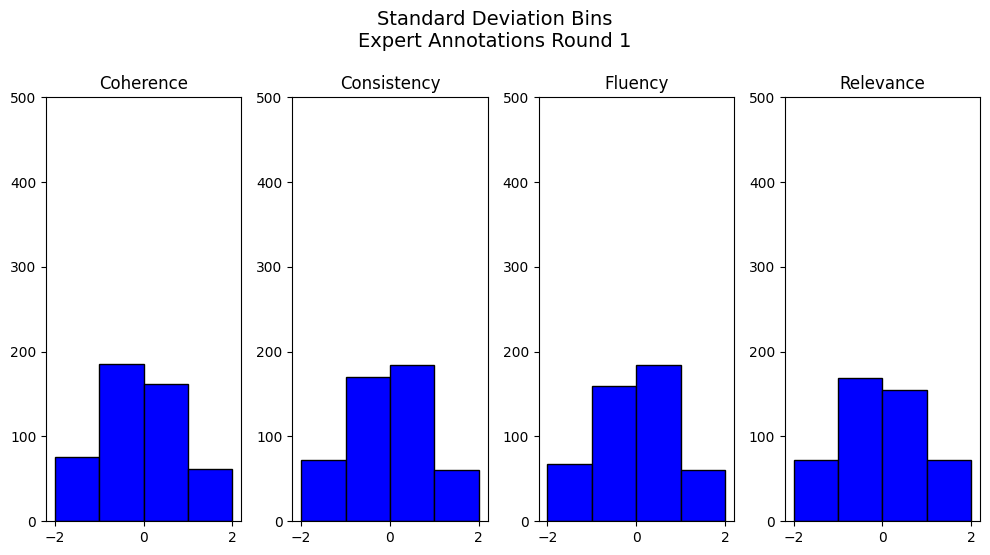

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the dataframe with the four columns.
# Let's create a sample dataframe with dummy data.
# In your case, you should replace this with:
# df = pd.read_csv('path_to_your_csv.csv') or any other method to load your dataframe.

# Sample data
data = {
    'Coherence': np.random.normal(loc=0, scale=1, size=500),
    'Consistency': np.random.normal(loc=0, scale=1, size=500),
    'Fluency': np.random.normal(loc=0, scale=1, size=500),
    'Relevance': np.random.normal(loc=0, scale=1, size=500)
}
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [-2, -1, 0, 1, 2]

# Titles for subplots
titles = ['Coherence', 'Consistency', 'Fluency', 'Relevance']

for ax, column, title in zip(axes, df.columns, titles):
    ax.hist(df[column], bins=bin_edges, color='blue', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 500)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round 1', y=1.10, fontsize=14)

# Show plot
plt.show()

In [50]:
df_500 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_first_pass_500.csv')
print(df_500.columns)
df_500.head(1)

Index(['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType',
       'source', 'prediction_(prompt_aggressiveness_score)_(gpt-4)',
       'prediction_(prompt_relevance_score)_(gpt-4)', 'uuid',
       'prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo)',
       'prediction_(prompt_coherence_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_relevance_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_suitableness_score)_(gpt-3.5-turbo)',
       'aggressiveness_score', 'coherence_score', 'relevance_score',
       'suitableness_score', 'obscenity_(pred_cs)',
       'identity_attack_(pred_cs)', 'insult_(pred_cs)', 'bleu_1_(cs, pred_cs)',
       'bleu_2_(cs, pred_cs)', 'cosine_similarity_(hs, pred_cs)',
       'rouge_l_(cs, pred_cs)', 'rouge_1_(cs, pred_cs)',
       'rouge_2_(cs, pred_cs)', 'meteor_score_(cs, pred_cs)',
       'bert_score_(hs, pred_cs)', 'toxicity_(pred_cs)',
       'pc_score_(hs, pred_cs)', 'cd_score_(hs, pred_cs)',
       'aq_score_(pred_cs)', 'bm25_sc

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,relevance_score_annotator_1,relevance_score_annotator_2,relevance_score_annotator_3,relevance_score_annotator_4,relevance_score_annotator_5,suitableness_score_annotator_1,suitableness_score_annotator_2,suitableness_score_annotator_3,suitableness_score_annotator_4,suitableness_score_annotator_5
0,"Every Muslim is a potential terrorist, unfit t...",I understand if you have concerns about Muslim...,It is crucial to deal with this issue with fee...,Positive,GPT3.5_ZS,NaN,NaN,e3eb1ff9-eee0-4d81-b953-02ee79e7364f,{'Aggressiveness': '1'},{'Argument Coherence': '5'},...,5,4,5,5,4,4,2,2,3,4


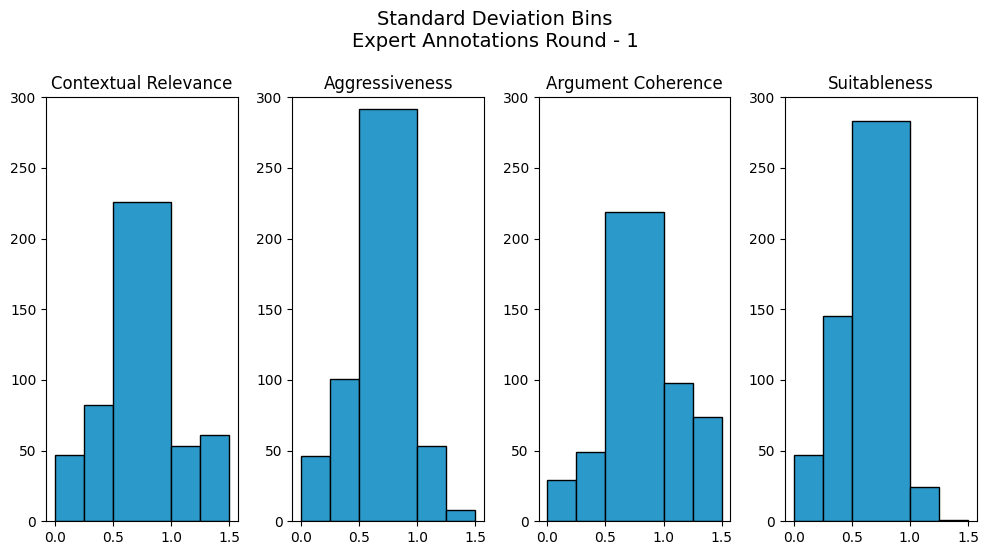

In [89]:
df_500['relevance_score_std_dev'] = df_500[['relevance_score_annotator_1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].std(axis=1)
df_500['aggressiveness_score_std_dev'] = df_500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].std(axis=1)
df_500['coherence_score_std_dev'] = df_500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].std(axis=1)
df_500['suitableness_score_std_dev'] = df_500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].std(axis=1)

# df_500['coherence_score_std_dev'].hist(bins=8)
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [0,0.25,0.5,1,1.25,1.5]

# Titles for subplots
titles = ['Contextual Relevance', 'Aggressiveness', 'Argument Coherence', 'Suitableness']
use_cols = ['relevance_score_std_dev', 'aggressiveness_score_std_dev', 'coherence_score_std_dev', 'suitableness_score_std_dev']

for ax, column, title in zip(axes, df_500[use_cols].columns, titles):
    ax.hist(df_500[column], bins=bin_edges, color='#2b99ca', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 300)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round - 1', y=1.10, fontsize=14)

# Show plot
plt.show()

In [90]:
df_1500 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_second_pass_1500_.csv')
print(df_1500.columns)
df_1500.head(1)

Index(['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType',
       'source', 'prediction_(prompt_aggressiveness_score)_(gpt-4)',
       'prediction_(prompt_relevance_score)_(gpt-4)', 'uuid',
       'prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo)',
       'prediction_(prompt_coherence_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_relevance_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_suitableness_score)_(gpt-3.5-turbo)',
       'aggressiveness_score', 'coherence_score', 'relevance_score',
       'suitableness_score', 'obscenity_(pred_cs)',
       'identity_attack_(pred_cs)', 'insult_(pred_cs)', 'bleu_1_(cs, pred_cs)',
       'bleu_2_(cs, pred_cs)', 'cosine_similarity_(hs, pred_cs)',
       'rouge_l_(cs, pred_cs)', 'rouge_1_(cs, pred_cs)',
       'rouge_2_(cs, pred_cs)', 'meteor_score_(cs, pred_cs)',
       'bert_score_(hs, pred_cs)', 'toxicity_(pred_cs)',
       'pc_score_(hs, pred_cs)', 'cd_score_(hs, pred_cs)',
       'aq_score_(pred_cs)', 'bm25_sc

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,aggressiveness_score_annotator_1,aggressiveness_score_annotator_2,aggressiveness_score_annotator_3,aggressiveness_score_annotator_4,aggressiveness_score_annotator_5,coherence_score_annotator_1,coherence_score_annotator_2,coherence_score_annotator_3,coherence_score_annotator_4,coherence_score_annotator_5
0,Muslims have no place in a modern democracy li...,Isn't divesity essential to a modern democracy?,I understand that you have a perspective on Mu...,Questioning,GPT3.5_ZS,NaN,NaN,165a7d8b-c325-4631-91b7-2bf5082a1054,{'Aggressiveness': '1'},{'Argument Coherence': '1'},...,1,1,1,1,1,2,2,1,2,1


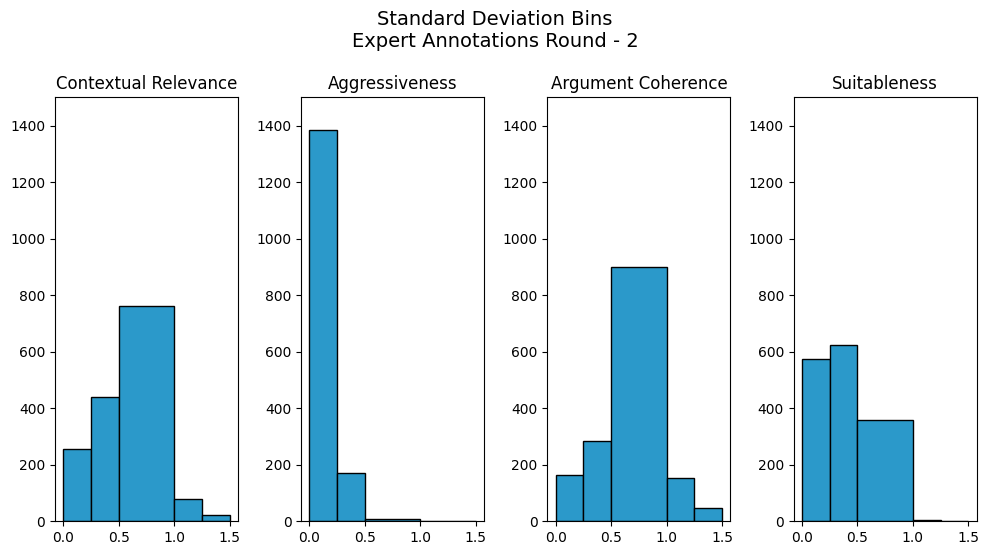

In [91]:
df_1500['relevance_score_std_dev'] = df_1500[['relevance_score_annotator_1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].std(axis=1)
df_1500['aggressiveness_score_std_dev'] = df_1500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].std(axis=1)
df_1500['coherence_score_std_dev'] = df_1500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].std(axis=1)
df_1500['suitableness_score_std_dev'] = df_1500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].std(axis=1)

# df_500['coherence_score_std_dev'].hist(bins=8)
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [0,0.25,0.5,1,1.25,1.5]

# Titles for subplots
titles = ['Contextual Relevance', 'Aggressiveness', 'Argument Coherence', 'Suitableness']
use_cols = ['relevance_score_std_dev', 'aggressiveness_score_std_dev', 'coherence_score_std_dev', 'suitableness_score_std_dev']

for ax, column, title in zip(axes, df_1500[use_cols].columns, titles):
    ax.hist(df_1500[column], bins=bin_edges, color='#2b99ca', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 1500)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round - 2', y=1.10, fontsize=14)

# Show plot
plt.show()

In [9]:
df_final = pd.read_csv('/home/ameyh/cs-eval/final_data/final_dataset_metrics_computed.csv')
df_final.head(1)

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,"rouge_l_(pred_cs, cs)","rouge_1_(pred_cs, cs)","rouge_2_(pred_cs, cs)","meteor_score_(pred_cs, cs)","bert_score_(hs, pred_cs)",toxicity_(pred_cs),"pc_score_(hs, pred_cs)","cd_score_(hs, pred_cs)",aq_score_(pred_cs),"bm25_score_(hs, pred_cs)"
0,"Women are basically childlike, they remain thi...",The characteristics you are referring to are a...,There are many cases of women being raped by m...,Informative,dialoGPT,NaN,{ \n'Relevance': '1'\n},511dd967-f04a-4bc4-a557-800af1656a96,{'Aggressiveness': '2'},{ \n'Coherence': '3'\n},...,0.205128,0.25641,0.0,0.129151,0.862441,0.283898,0.981284,0.698875,0.813657,-0.545166


In [13]:
print(f"Total number of unique hate speech: {df_final['hatespeech'].unique().shape}")
print(f"Total number of unique counter speech: {df_final['counterspeech'].unique().shape}")
print(f"Total number of unique predicted counter speech: {df_final['predicted_counterspeech'].unique().shape}")
print(f"Total number of datapoints {df_final.shape}")


Total number of unique hate speech: (2009,)
Total number of unique counter speech: (4461,)
Total number of unique predicted counter speech: (13843,)
Total number of datapoints (14508, 33)


In [16]:
# Average scores over each model
df_grouped = df_final[['source', 'aggressiveness_score', 'relevance_score', 'coherence_score', 'suitableness_score']].groupby('source').mean()
df_grouped

,aggressiveness_score,relevance_score,coherence_score,suitableness_score
source,,,,
GPS,1.068627,4.210240,2.668845,2.296296
GPT3.5_FS,1.053942,4.667704,3.558437,2.601660
GPT3.5_ZS,1.050411,4.768020,3.951414,2.732208
QUARC,1.002650,4.812426,4.037986,2.808598
dialoGPT,0.986292,4.624743,3.661755,2.796779


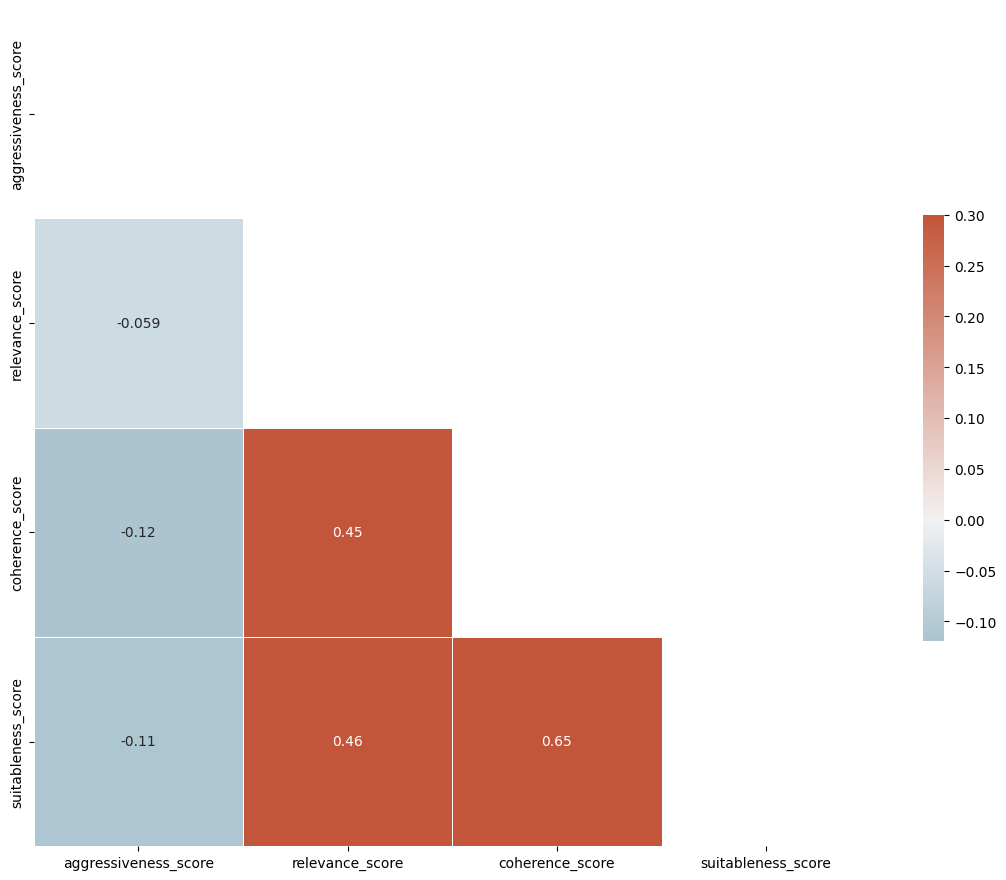

In [97]:
# Heatmap (correleation) between different metrics
import seaborn as sns

df = pd.read_csv('/home/ameyh/cs-eval/final_data/final_dataset_metrics_computed.csv')
gold_cols = ['aggressiveness_score', 'relevance_score', 'coherence_score', 'suitableness_score']
automated_metric_cols = ['']

# Calculate the correlation matrix
corr = df[gold_cols].corr()

# Create a mask to display only one triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Inter-annotator Agreement

In [2]:
import numpy as np
import krippendorff

def calculate_krippendorff_alpha(data):
    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(reliability_data=data)
    
    return alpha

# Toy data: 5 annotators (rows) and 5 data points (columns)
data = np.array([
    [1, 2, 3, 2, 1],
    [2, 3, 4, 3, 2],
    [3, 4, 5, 4, 3],
    [2, 3, 4, 3, 2],
    [1, 2, 3, 2, 1],
])
print(data.shape)

alpha = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha: {alpha}")

(5, 5)
Krippendorff's alpha: 0.3999999999999999


In [188]:
df_500 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_first_pass_500.csv')
df_500.head(1)

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,relevance_score_annotator_1,relevance_score_annotator_2,relevance_score_annotator_3,relevance_score_annotator_4,relevance_score_annotator_5,suitableness_score_annotator_1,suitableness_score_annotator_2,suitableness_score_annotator_3,suitableness_score_annotator_4,suitableness_score_annotator_5
0,"Every Muslim is a potential terrorist, unfit t...",I understand if you have concerns about Muslim...,It is crucial to deal with this issue with fee...,Positive,GPT3.5_ZS,NaN,NaN,e3eb1ff9-eee0-4d81-b953-02ee79e7364f,{'Aggressiveness': '1'},{'Argument Coherence': '5'},...,5,4,5,5,4,4,2,2,3,4


In [189]:
data = df_500[['relevance_score_annotator_1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].values.T
alpha1 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (relevance score): {alpha1}")

data = df_500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].values.T
alpha2 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (aggressiveness): {alpha2}")

data = df_500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].values.T
alpha3 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (coherence): {alpha3}")

data = df_500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].values.T
alpha4 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (suitableness): {alpha4}")

print(f"Average Krippendorff's alpha: {(alpha1+alpha2+alpha3+alpha4)/4}")

Krippendorff's alpha (relevance score): 0.5521815579452288
Krippendorff's alpha (aggressiveness): 0.5496895261029692
Krippendorff's alpha (coherence): 0.5610619896126403
Krippendorff's alpha (suitableness): 0.4708653346902323
Average Krippendorff's alpha: 0.5334496020877677


In [190]:
df_1500 = pd.read_csv('/home/ameyh/cs-eval/annotations/annotations_second_pass_1500_.csv')
print(df_1500.shape)
df_1500.head(1)

(1562, 59)


,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,aggressiveness_score_annotator_1,aggressiveness_score_annotator_2,aggressiveness_score_annotator_3,aggressiveness_score_annotator_4,aggressiveness_score_annotator_5,coherence_score_annotator_1,coherence_score_annotator_2,coherence_score_annotator_3,coherence_score_annotator_4,coherence_score_annotator_5
0,Muslims have no place in a modern democracy li...,Isn't divesity essential to a modern democracy?,I understand that you have a perspective on Mu...,Questioning,GPT3.5_ZS,NaN,NaN,165a7d8b-c325-4631-91b7-2bf5082a1054,{'Aggressiveness': '1'},{'Argument Coherence': '1'},...,1,1,1,1,1,2,2,1,2,1


In [191]:
data = df_1500[['relevance_score_annotator_1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].values.T
alpha1 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (relevance score): {alpha1}")

data = df_1500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].values.T
alpha2 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (aggressiveness): {alpha2}")

data = df_1500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].values.T
alpha3 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (coherence): {alpha3}")

data = df_1500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].values.T
alpha4 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (suitableness): {alpha4}")

print(f"Average Krippendorff's alpha: {(alpha1+alpha2+alpha3+alpha4)/4}")

Krippendorff's alpha (relevance score): 0.802126254551246
Krippendorff's alpha (aggressiveness): 0.7097725372790129
Krippendorff's alpha (coherence): 0.7326519605262378
Krippendorff's alpha (suitableness): 0.6853627258147301
Average Krippendorff's alpha: 0.7324783695428067


In [1]:
import pandas as pd
dataset = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/dataset.csv')
dataset.shape

(7926, 75)

In [3]:
dataset.annotator.value_counts()

annotator
(amey,osho,apoorv)_mean    1500
(shaily,rishabh)           1000
(aswini)                    400
Name: count, dtype: int64

In [9]:
len(dataset['predicted_counterspeech'].unique())

5627

In [10]:
dataset['predicted_counterspeech'].value_counts()

predicted_counterspeech
It is important to promote inclusivity and respect for all individuals, regardless of their religious background.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [11]:
len(dataset)

7926

In [15]:
1400 / 5,627

(280.0, 627)